In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Libraries

In [2]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

We reload the inputs and targets preprocessed data work in first step :

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None)

### Explore Data

In [4]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [5]:
loan_data_targets_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0


In [6]:
loan_data_inputs_train.shape

(373028, 324)

In [7]:
loan_data_targets_train.shape

(373028, 1)

In [8]:
loan_data_inputs_test.shape

(93257, 324)

In [9]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

We decide to only select the features we choose in the preprocessing step

In [10]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]


<center> Recall that for each feature, we kept  the category with the lower WoE as the reference categorie. </center> 


In [11]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [12]:
# We drop the columns with variable names in the list with reference categories. 
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
reg = LogisticRegression()

In [15]:
pd.options.display.max_rows = None

In [16]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

reg.fit(inputs_train, loan_data_targets_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Displays the intercept 
reg.intercept_

array([-1.70379977])

In [18]:
# Displays the coefficients for each columns (category - features)
reg.coef_

array([[ 1.11623674,  0.87859502,  0.68445935,  0.49652362,  0.32114499,
         0.13296388,  0.09124677,  0.1067525 ,  0.03739756,  0.05940361,
         0.06019763,  0.06274922,  0.07880915,  0.13639194,  0.1007273 ,
         0.18524321,  0.2407948 ,  0.22455863,  0.26317771,  0.32134522,
         0.52296159,  0.08813789, -0.01071227,  0.3044634 ,  0.20094547,
         0.21359492,  0.26665554,  0.05397901,  0.07922776,  0.10042894,
         0.12548329,  0.0906677 ,  0.06057889,  0.12324541,  1.07167877,
         0.871346  ,  0.77105195,  0.57014273,  0.4086418 ,  0.16344655,
        -0.07238807,  0.88183231,  0.55469732,  0.30333608,  0.11130771,
         0.05590375,  0.03756645,  0.07859487,  0.1192599 ,  0.12487054,
         0.08992534,  0.04742607,  0.66575458,  0.52203567,  0.31268827,
         0.32550232,  0.22914117,  0.20309041,  0.1867138 ,  0.18514828,
         0.21386006,  0.12739662,  0.12333193,  0.15699215, -0.02025808,
         0.02660103,  0.20105142,  0.04252795,  0.0

In [19]:
# Let's store the names of the columns of the inputs dataframe use in the Regression.
feature_name = inputs_train.columns.values

In [20]:
# Store in a summary table the coefficients for each feature and 
# save the intercept in the first row

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.703800
1,grade:A,1.116237
2,grade:B,0.878595
3,grade:C,0.684459
4,grade:D,0.496524
5,grade:E,0.321145
6,grade:F,0.132964
7,home_ownership:OWN,0.091247
8,home_ownership:MORTGAGE,0.106753
9,addr_state:NM_VA,0.037398


## Build a Logistic Regression Model with P-Values

Need a model to asses , how much each feature  contributed to predicting borrower default or not. So the aim is to keep those who predict the </b>good/bad</b> outcome. 

A statistical well-know method to do that is to estimate p-values on coefficients using a likelihood ratio test.

In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values()

In [23]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
reg.fit(inputs_train, loan_data_targets_train)

In [24]:
# Same as above, we summarize in a table the results

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.703800
1,grade:A,1.116237
2,grade:B,0.878595
3,grade:C,0.684459
4,grade:D,0.496524
5,grade:E,0.321145
6,grade:F,0.132964
7,home_ownership:OWN,0.091247
8,home_ownership:MORTGAGE,0.106753
9,addr_state:NM_VA,0.037398


In [25]:
# This is the list of p_values
p_values = reg.p_values

In [26]:
# Set the p_value for the intercept to NaN
p_values = np.append(np.nan, np.array(p_values))

In [27]:
summary_table['p_values'] = p_values

In [28]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.703800,NaN
1,grade:A,1.116237,1.276871e-34
2,grade:B,0.878595,9.572292e-47
3,grade:C,0.684459,1.644180e-33
4,grade:D,0.496524,3.086977e-20
5,grade:E,0.321145,2.619122e-11
6,grade:F,0.132964,8.103058e-03
7,home_ownership:OWN,0.091247,6.146562e-06
8,home_ownership:MORTGAGE,0.106753,4.297800e-17
9,addr_state:NM_VA,0.037398,2.435558e-01



##### We are going to remove some features, the coefficients for all or almost all of the dummy variables for which are not statistically significant.


Looking at each p-value individually, it would be to drastic to simply remove unsignificants dummy variables.

So we will keep  all the  dummy variables representing one feature  for which one of few dummy variables are statistically significant.

Looking at their corresponding <b>p values</b> summary table above, we will remove  all
<center> <b> delinq_2yrs , open_acc , pub_rec, total_acc and total_rev_hi_lim </b> </center>
from the dummy variables. 

In [29]:
# We do that by specifying another list of dummy variables as reference categories, 
# and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

# The new reference categories without the remove features is 
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']


<center>Need to retrain the model without those features </center>


In [30]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [31]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [32]:
feature_name = inputs_train.columns.values

In [33]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.385395
1,grade:A,1.121520
2,grade:B,0.881507
3,grade:C,0.687851
4,grade:D,0.500477
5,grade:E,0.325091
6,grade:F,0.137039
7,home_ownership:OWN,0.093505
8,home_ownership:MORTGAGE,0.105977
9,addr_state:NM_VA,0.037053


In [34]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values

summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.385395,NaN
1,grade:A,1.121520,4.753387e-35
2,grade:B,0.881507,2.158571e-47
3,grade:C,0.687851,3.271838e-34
4,grade:D,0.500477,6.929364e-21
5,grade:E,0.325091,5.871894e-12
6,grade:F,0.137039,5.231950e-03
7,home_ownership:OWN,0.093505,3.462640e-06
8,home_ownership:MORTGAGE,0.105977,5.303227e-17
9,addr_state:NM_VA,0.037053,2.472817e-01


## Saving the train LogisticRegression model

In [35]:
import pickle

In [36]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [37]:
# Here, from the dataframe with inputs for testing, 
# we keep the same variables that we used in our final PD model.

inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [38]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [39]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [40]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

y_hat_test = reg2.model.predict(inputs_test)

In [41]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [43]:
y_hat_test_proba

array([[0.07583108, 0.92416892],
       [0.15145322, 0.84854678],
       [0.11440192, 0.88559808],
       ...,
       [0.02678179, 0.97321821],
       [0.04025139, 0.95974861],
       [0.0476315 , 0.9523685 ]])

In [44]:
# we take only the probabilities for being 1. 
# The probabilities for being a good borrower 

y_hat_test_proba[:][:,1]

array([0.92416892, 0.84854678, 0.88559808, ..., 0.97321821, 0.95974861,
       0.9523685 ])

In [45]:
# We store these probabilities in a variable.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [46]:
y_hat_test_proba

array([0.92416892, 0.84854678, 0.88559808, ..., 0.97321821, 0.95974861,
       0.9523685 ])

In [47]:
loan_data_targets_test_temp = loan_data_targets_test

In [48]:
# We reset the index of a dataframe.
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [49]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [50]:
df_actual_predicted_probs.shape

(93257, 2)

In [51]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

We have to keep the same index in this dataframe as the ones in the  inputs data test set. It would be important when we will merge the data Frame after some accuracy evaluation

In [52]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [53]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924169
288564,1,0.848547
213591,1,0.885598
263083,1,0.940579
165001,1,0.968701


### Accuracy and Area under the Curve

In [54]:
# set the thresholds parameter
tr = 0.5

# set all the predicted probas to be 0 when they are lower or equal than the threshold
df_actual_predicted_probs['y_hat_test'] = np.where((df_actual_predicted_probs['y_hat_test_proba']>tr), 1, 0)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924169,1
288564,1,0.848547,1
213591,1,0.885598,1
263083,1,0.940579,1
165001,1,0.968701,1


In [55]:
# Confusion Matrix 
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6,10184
1,6,83061


In [56]:
# Confusion matrix 

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000064,0.109204
1,0.000064,0.890668


In [57]:
# Accuracy score : number of true prediction (bads as bads and goods as goods)

(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]\
+\
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.890732063008675



we can see that under the threshold <b>tr = 0.5</b> , within the 10190 bads,  <b>10184</b> are predicted to be good.

This is actually a real problem for <b> the business purpose </b>

So we will adopt a more conservative cut-off <b>tr = 0.9 </b>



In [58]:
# We set the threshold parameter
tr = 0.9
# and set every predicted probabilities lower than the threshold at 0 (default)
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [59]:
# Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,35811,47256


In [60]:
# thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.384003,0.506729


In [61]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5858112527745907


With a high threshold  <b>tr = 0.9</b>, the accuracy decrease but it does not really matter. The import fact is that, instead of almost <b>11%</b> in the previous threshold, we have now only <b>3%</b> of Defaulted predicted as non-Defaulted.


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

In [63]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99266112, 0.99266112, 0.99073202, ..., 0.48797074, 0.39312673,
        0.37262574]))

In [64]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

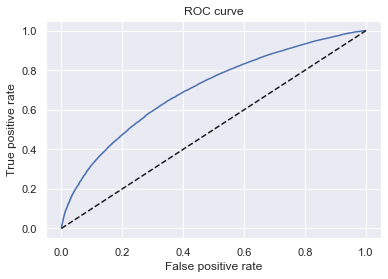

In [66]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [67]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7022177629458412

Does the AUC  is efficient ?  Difficult to say.

Commonly

Interpretation | AUC
---------------------
Bad | 50% to 60%
-
Poor | 60% to 70%
-
Fair | 70% to 80%
-
Good | 80% to 90%
-
Excellent | 90% to 100%



So for  our model , it is <b>Fair</b>

<center> Not so Bad , yeah ? </center>

### Gini and Kolmogorov-Smirnov

In credit risk, these are two well-known measures to see how good the model perfom.

<b>Gini coefficient</b> is used to measure <b>inequality</b> between non-defaulted (<b>good</b>) and defaulted (<b>Bad</b>) borrowers.

<b>Kolmogorov coefficient</b> is used to show how the model seperate the non_defaulted (<b>good</b>) from the defaulted (<b>Bad</b>) borrowers.

In [68]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [69]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.372626,0
42344,1,0.391437,0
39810,0,0.393127,0
40518,0,0.448663,0
42396,0,0.455010,0


In [70]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
262480,1,0.991249,1
231463,1,0.991305,1
239228,1,0.991660,1
261086,1,0.992065,1
242624,1,0.992661,1


In [71]:
# We reset the index of a dataframe and overwrite it.
# keep the previous one as a column

df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [72]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.372626,0
1,42344,1,0.391437,0
2,39810,0,0.393127,0
3,40518,0,0.448663,0
4,42396,0,0.455010,0


In [73]:
# We calculate the cumulative number of all observations using the reset index
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1

# We calculate cumulative number of 'good'
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()

# We calculate cumulative number of 'bad', which is
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [74]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.372626,0,1,1,0
1,42344,1,0.391437,0,2,2,0
2,39810,0,0.393127,0,3,2,1
3,40518,0,0.448663,0,4,2,2
4,42396,0,0.455010,0,5,2,3


In [75]:
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])

# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()

# We calculate the cumulative percentage of 'bad'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [76]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.372626,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.391437,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.393127,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448663,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.455010,0,5,2,3,0.000054,0.000024,0.000294


In [77]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,262480,1,0.991249,1,93253,83063,10190,0.999957,0.999952,1.0
93253,231463,1,0.991305,1,93254,83064,10190,0.999968,0.999964,1.0
93254,239228,1,0.991660,1,93255,83065,10190,0.999979,0.999976,1.0
93255,261086,1,0.992065,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.992661,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

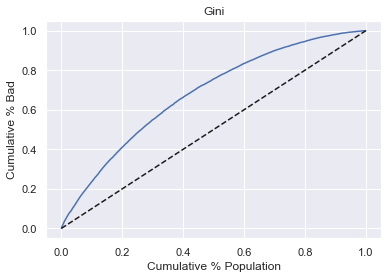

In [78]:
# Plot Gini
# We plot the cumulative percentage of all along the x-axis and 
# the cumulative percentage 'good' along the y-axis

plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [79]:
# Gini's formula using the AUROC.
Gini = AUROC * 2 - 1
Gini

0.4044355258916823

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

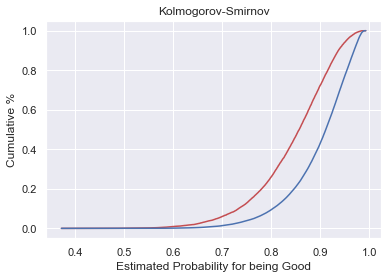

In [80]:
# Plot KS
# We plot the predicted (estimated) probabilities along the x-axis and 
# the cumulative percentage 'bad' along the y-axis

plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [81]:
# We calculate KS from the data. It is the maximum of the difference between 
# the cumulative percentage of 'bad' and the cumulative percentage of 'good'.

KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2966177993188114

# Applying the PD Model

### Calculating PD of individual accounts

In [82]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [83]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [84]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.385395,NaN
1,grade:A,1.121520,4.753387e-35
2,grade:B,0.881507,2.158571e-47
3,grade:C,0.687851,3.271838e-34
4,grade:D,0.500477,6.929364e-21
5,grade:E,0.325091,5.871894e-12
6,grade:F,0.137039,5.231950e-03
7,home_ownership:OWN,0.093505,3.462640e-06
8,home_ownership:MORTGAGE,0.105977,5.303227e-17
9,addr_state:NM_VA,0.037053,2.472817e-01


In [85]:
y_hat_test_proba

array([0.92416892, 0.84854678, 0.88559808, ..., 0.97321821, 0.95974861,
       0.9523685 ])


# Creating a Scorecard


In [86]:
summary_table.head()

,Feature name,Coefficients,p_values
0,Intercept,-1.385395,NaN
1,grade:A,1.121520,4.753387e-35
2,grade:B,0.881507,2.158571e-47
3,grade:C,0.687851,3.271838e-34
4,grade:D,0.500477,6.929364e-21


In [87]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [88]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [89]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()

df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.385395,NaN
1,1,grade:A,1.121520,4.753387e-35
2,2,grade:B,0.881507,2.158571e-47
3,3,grade:C,0.687851,3.271838e-34
4,4,grade:D,0.500477,6.929364e-21
5,5,grade:E,0.325091,5.871894e-12
6,6,grade:F,0.137039,5.231950e-03
7,7,home_ownership:OWN,0.093505,3.462640e-06
8,8,home_ownership:MORTGAGE,0.105977,5.303227e-17
9,9,addr_state:NM_VA,0.037053,2.472817e-01


In [90]:
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.385395,NaN,Intercept
1,1,grade:A,1.121520,4.753387e-35,grade
2,2,grade:B,0.881507,2.158571e-47,grade
3,3,grade:C,0.687851,3.271838e-34,grade
4,4,grade:D,0.500477,6.929364e-21,grade
5,5,grade:E,0.325091,5.871894e-12,grade
6,6,grade:F,0.137039,5.231950e-03,grade
7,7,home_ownership:OWN,0.093505,3.462640e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.105977,5.303227e-17,home_ownership
9,9,addr_state:NM_VA,0.037053,2.472817e-01,addr_state


Let's say we want a scorecard with score range  :

$$ \textbf{Minimum score} = 300 $$

$$ \textbf{Maximum score} = 850 $$

In [91]:
min_score = 300
max_score = 850

In [92]:
# Group the data by Original features,
# and  aggregate further by min  and sum all the minimum values.

min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5478236224860793

In [93]:
#  Now the maximum values.
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.6059676439951645

We use the simple formula
$$ variable_{-}score =  variable_{-}coef\quad \frac{( max_{-}score - min_{-}score )}{( max_{-}sum_{-}coef - min_{-}sum_{-}coef )} $$

In [94]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.385395,NaN,Intercept,-106.512392
1,1,grade:A,1.121520,4.753387e-35,grade,86.225013
2,2,grade:B,0.881507,2.158571e-47,grade,67.772288
3,3,grade:C,0.687851,3.271838e-34,grade,52.883554
4,4,grade:D,0.500477,6.929364e-21,grade,38.477842


 For the intercep score, 
 
 $$ intercept_{-}score = \frac{intercept_{-}coef - min_{-}sum_{-}coef}{( max_{-}sum_{-}coef - min_{-}sum_{-}coef )} ( max_{-}score - min_{-}score )$$
 

In [95]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.385395,NaN,Intercept,312.487864
1,1,grade:A,1.121520,4.753387e-35,grade,86.225013
2,2,grade:B,0.881507,2.158571e-47,grade,67.772288
3,3,grade:C,0.687851,3.271838e-34,grade,52.883554
4,4,grade:D,0.500477,6.929364e-21,grade,38.477842


In [96]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.385395,NaN,Intercept,312.487864,312.0
1,1,grade:A,1.121520,4.753387e-35,grade,86.225013,86.0
2,2,grade:B,0.881507,2.158571e-47,grade,67.772288,68.0
3,3,grade:C,0.687851,3.271838e-34,grade,52.883554,53.0
4,4,grade:D,0.500477,6.929364e-21,grade,38.477842,38.0


In [97]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.

min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

299.0

In [98]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.

max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

849.0

<center> We need to adjust so that the minimum and maximum score to be 300 and 850 respectively </center>

Since we rounded, in our case, a simple way is to add 1 to the value minimum rounded value, and  the same to the maximum rounded value

In [99]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard['Difference'].head()

0   -0.487864
1   -0.225013
2    0.227712
3    0.116446
4   -0.477842
Name: Difference, dtype: float64

In [100]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16

In [101]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

### Caclulating Credit Score

<center>To calculate the  credit score of a borrower, we only have to sum the credit scores corresponding to the respective dummy variables categories </center>

In [102]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [103]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.385395,NaN,Intercept,312.487864,312.0,-0.487864,312.0
1,1,grade:A,1.121520,4.753387e-35,grade,86.225013,86.0,-0.225013,86.0
2,2,grade:B,0.881507,2.158571e-47,grade,67.772288,68.0,0.227712,68.0
3,3,grade:C,0.687851,3.271838e-34,grade,52.883554,53.0,0.116446,53.0
4,4,grade:D,0.500477,6.929364e-21,grade,38.477842,38.0,-0.477842,38.0


In [104]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [105]:
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [106]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [107]:
# we keep only the columns with column names that are in df_scorecard['feature name'],
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [108]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [109]:
scorecard_scores = df_scorecard['Score - Final']

In [110]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [111]:
scorecard_scores.shape

(102,)

In [112]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [113]:
scorecard_scores.shape

(102, 1)

In [114]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [115]:
y_scores.head()

,0
362514,610.0
288564,551.0
213591,577.0
263083,630.0
165001,683.0


In [116]:
y_scores.tail()

,0
115,571.0
296284,676.0
61777,694.0
91763,661.0
167512,649.0


### From Credit Score to PD

We have  already seen how to go from PD to credit score, the converse is done applying the formula

$$ sum_{-}of_{-}coef_{-}from_{-}score = \frac{( total_{-}score - min_{-}score )}{( max_{-}score - min_{-}score )} ( max_{-}sum_{-}coef - min_{-}sum_{-}coef) + min_{-}sum_{-}coef$$

In [117]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [118]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.923035
288564,0.847730
213591,0.886461
263083,0.939599
165001,0.968745


In [119]:
y_hat_test_proba[0: 5]

array([0.92416892, 0.84854678, 0.88559808, 0.94057941, 0.96870126])

In [120]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.372626
1    0.391437
2    0.393127
3    0.448663
4    0.455010
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

Let look at the ROC curve we plot earlier

In [121]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [122]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,35811,47256


In [123]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.384003,0.506729


In [124]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5858112527745907

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

In [126]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99266112, 0.99266112, 0.99073202, ..., 0.48797074, 0.39312673,
        0.37262574]))

In [127]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

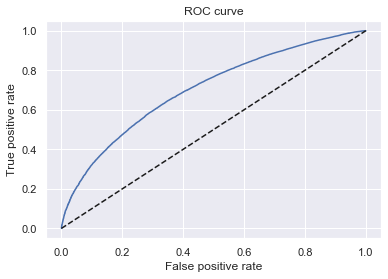

In [129]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [130]:
thresholds

array([1.99266112, 0.99266112, 0.99073202, ..., 0.48797074, 0.39312673,
       0.37262574])

In [131]:
thresholds.shape

(17240,)

In [132]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [133]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [134]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992661,0.000000,0.000000
1,0.992661,0.000000,0.000012
2,0.990732,0.000000,0.000120
3,0.990661,0.000098,0.000120
4,0.989775,0.000098,0.000445


In [135]:
# Set the first row threshold to 1
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

For setting cutoffs, 
 - a common way is based on estimating probability to be good
 - An other is using credit scores using the formula
 
 $$ score_{-}from_{-}prob = \Big( \ln\frac{prob_{-}good}{1- prob_{-}good } - min_{-}score_{-}coef \Big) \frac{(max_{-}score - min_{-}score )}{( max_{-}sum_{-}coef - min_{-}sum_{-}coef )} + min_{-}score$$

In [136]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [137]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3243.0
1,0.992661,0.000000,0.000012,796.0
2,0.990732,0.000000,0.000120,778.0
3,0.990661,0.000098,0.000120,778.0
4,0.989775,0.000098,0.000445,771.0


In [138]:
df_cutoffs['Score'][0] = max_score

In [139]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992661,0.000000,0.000012,796.0
2,0.990732,0.000000,0.000120,778.0
3,0.990661,0.000098,0.000120,778.0
4,0.989775,0.000098,0.000445,771.0


In [140]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17235,0.493179,0.999411,0.999964,417.0
17236,0.492400,0.999509,0.999964,417.0
17237,0.487971,0.999509,0.999976,415.0
17238,0.393127,1.000000,0.999976,386.0
17239,0.372626,1.000000,1.000000,379.0


<center> Number of Approved + Number of Rejected = Total</center>
<center>Approval Rate = Number of Approved /Total</center>
<center>Rejection Rate = Number of Rejected/Total </center>

In [141]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [142]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [143]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992661,0.000000,0.000012,796.0,1,93256,0.000011,0.999989
2,0.990732,0.000000,0.000120,778.0,10,93247,0.000107,0.999893
3,0.990661,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989775,0.000098,0.000445,771.0,38,93219,0.000407,0.999593


In [144]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17235,0.493179,0.999411,0.999964,417.0,93248,9,0.999903,0.000097
17236,0.492400,0.999509,0.999964,417.0,93249,8,0.999914,0.000086
17237,0.487971,0.999509,0.999976,415.0,93250,7,0.999925,0.000075
17238,0.393127,1.000000,0.999976,386.0,93255,2,0.999979,0.000021
17239,0.372626,1.000000,1.000000,379.0,93257,0,1.000000,0.000000


Setting the <b>cut-offs</b> at no less than 95% will give a <b>reject rate</b> and <b>approval rate</b> of approximatively <b>21%</b> and <b>79%</b> respectively according to the table below.

The closest credit score associated is $\mathbf{645}$.

In [145]:
df_cutoffs[df_cutoffs['thresholds']>=0.95].tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1189,0.950089,0.057802,0.227467,646.0,19484,73773,0.208928,0.791072
1190,0.950034,0.057802,0.227840,645.0,19515,73742,0.209260,0.790740
1191,0.950032,0.057900,0.227840,645.0,19516,73741,0.209271,0.790729
1192,0.950006,0.057900,0.228033,645.0,19532,73725,0.209443,0.790557
1193,0.950006,0.057998,0.228033,645.0,19533,73724,0.209453,0.790547


Setting the <b>cut-offs</b> at no less than 94% will give a <b>reject rate</b> and <b>approval rate</b> of approximatively <b>28%</b> and <b>72%</b> respectively,
according to the table below

The closest credit score associated is $\mathbf{631}$.

In [146]:
df_cutoffs[df_cutoffs['thresholds']>=0.94].tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1784,0.940089,0.088420,0.298169,631.0,25669,67588,0.275250,0.724750
1785,0.940048,0.088420,0.298410,631.0,25689,67568,0.275465,0.724535
1786,0.940047,0.088420,0.298434,631.0,25691,67566,0.275486,0.724514
1787,0.940008,0.088420,0.298843,631.0,25725,67532,0.275851,0.724149
1788,0.940002,0.088518,0.298843,631.0,25726,67531,0.275861,0.724139


Setting the <b>cut-offs credit score</b> at 670 points, the probability pf being good is <b>96%</b> respectively, according to the table below

In [147]:
df_cutoffs[df_cutoffs['Score'] >= 670].tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
561,0.963023,0.026987,0.139093,670.0,11829,81428,0.126843,0.873157
562,0.962994,0.026987,0.139261,670.0,11843,81414,0.126993,0.873007
563,0.962990,0.027085,0.139261,670.0,11844,81413,0.127004,0.872996
564,0.962976,0.027085,0.139442,670.0,11859,81398,0.127165,0.872835
565,0.962975,0.027184,0.139442,670.0,11860,81397,0.127175,0.872825


### Saving files as csv

In [148]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [149]:
df_scorecard.to_csv('df_scorecard.csv')